# 03-pytorch

In this page we will learn about image classification. We will be using MNIST Handwritten Digits Database as our training dataset. Dataset consists of  28px by 28px grayscale images of handwritten digits(0 to 9) and labels for each image indicating which digit it represents

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
#Download training dataset
dataset = MNIST( root = 'data/', download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/opt/conda/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
len(dataset)

60000

The dataset has 60,000 images that we'll use to train the model. There is also an additional test set of 10,000 images used for evaluating models and reporting metrics in papers and reports. We can create the test dataset using the `MNIST` class by passing `train=False` to the constructor.

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

Let's look at a sample element from the training dataset

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F770C13A5B0>, 5)

It's a pair, consisting of a 28px X 28px image and label. The image is an object of the class `PIL.Image.Image`, which is a part of the Python imaging library `Pillow`. We can view the image with Jupyter notebook using `matplotlib`, the de-facto plotting and graphing library for data science in Python

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

The statement `%matplotlib inline ` indicates to Jupyter that we want to plot the graphs within the notebook. Without this line, Jupyter will show the image in popup. Statement starting with % are called magic commands and are used to configure the behavior of Jupyter notebook.

Lets look at a couple of images from the dataset

Label: 5


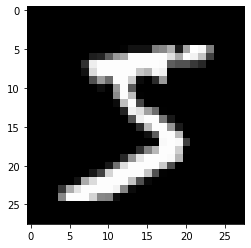

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

So as you can see the image here, but PyTorch doesn't know how to work with images. We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset

In [8]:
import torchvision.transforms as transforms

PyTorch dataset allow us to specify one more transformation function that are applied to the images as they are loaded. The `torchvision.transforms` module contains many such predefined functions. We'll use the `ToTensor` transform to convert images into PyTorch tensors 

In [9]:
dataset = MNIST(root='data/',
                train= True,
                transform = transforms.ToTensor())

In [10]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


The image tensor is now converted to a 1x28x28 tensor. The first dimension tracks color channels. The second and third dimension represent pixels along the height and width of the image, respectively.

Here we have taken single 0th element from our dataset which where converted to tensors earlier so essentially now `img_tensor` is a single tensor and `label` is the label for the same tensor, which is 5, we can use plot to see what does a tensor say when converted, in this case its 5

In [11]:
print(img_tensor)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [12]:
print(img_tensor[0,10:15,:])

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0549, 0.0039, 0.6039, 0.9922, 0.3529, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.5451, 0.9922, 0.7451, 0.0078, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0431, 0.7451, 0.9922, 0.2745, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.1373, 0.9451, 0.8824, 0.6275, 0.4235, 0.0039,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [13]:
print(torch.max(img_tensor), torch.min(img_tensor))

tensor(1.) tensor(0.)


So, the values ranges from 0 to 1, 0 representing black, 1 representing white, and the values in between different shades of grey.
We can plot the tensor also

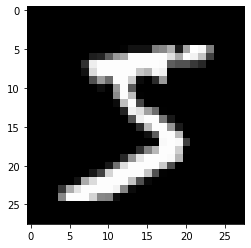

In [14]:
plt.imshow(img_tensor[0], cmap= 'gray')

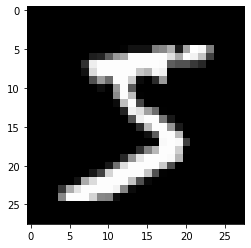

In [15]:
plt.imshow(img_tensor[0, 0:28, 0:28], cmap= 'gray')

### Training and Validation

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. <b>Training set</b> - used to train the model, i.e. compute the loss and adjust the model's weights using gradient descent

2. <b> Validation set</b> - used to evaluate the model during training, adjust hyperparameters(learning rate etc.) and pick the best version of the model

3. <b> Test set </b> - used to compare different models or approaches and report the model's final accuracy.

This dataset doesn't contain any predefined validation set , so we shall split the dataset manually for validation using `random_split` method from PyTorch.

In [16]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

Now we shall create a dataloaders to help us load the the data in batches. We'll use a batch size of 128.

In [17]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size)

We set `shuffle = True` for the training dataloader to ensure that the batches generated in each epoch are different.

### Model
 
 Now that we have prepared our data loaders, we can define our model

* A logistic regression model is almost identical to a linear regression model. It contains weights and bias matrices, and the output is obtained using simple matrix multiplication

* As we did with linear regression , we can use nn.linear to create the model instead of manually creating and initializing the matrices.
* since nn.Linear expects each training example to be a vector, each  1x28x28 image tensor is flattenned into a vector of size 784 before being passed in to the model
* the output of each image is a vector of size 10, with each element signifying the probability of a particular target label[0 to 9] the predicted label for an image is simply the one with the highest probability

In [18]:
import torch.nn as nn
input_size = 28 * 28
num_classes = 10

model = nn.Linear(input_size, num_classes)
# last time we used 3, 2, 3 is for feature 2 is for target accordingly weights and biases
#were created


In [19]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0316, -0.0178, -0.0100,  ..., -0.0263,  0.0138, -0.0209],
        [-0.0050,  0.0333, -0.0261,  ...,  0.0190,  0.0034,  0.0232],
        [ 0.0347, -0.0148,  0.0075,  ..., -0.0013,  0.0079,  0.0130],
        ...,
        [ 0.0015,  0.0111,  0.0261,  ...,  0.0116, -0.0042,  0.0324],
        [-0.0106, -0.0027,  0.0056,  ...,  0.0155,  0.0307,  0.0055],
        [ 0.0120, -0.0199, -0.0020,  ..., -0.0092,  0.0090, -0.0154]],
       requires_grad=True)

In [20]:
print(model.bias.shape)

torch.Size([10])


In [21]:
len(train_loader)

391

In [22]:
z = 50000 / 128
print(z)

390.625


In [23]:
img, lbl = dataset[0]
print(lbl)

5


In [24]:
print(img.shape)

torch.Size([1, 28, 28])


In [25]:
#dataset -> tensor dataset -> train_loader 
# len of dataset was 50000 and batch_size was 128
# so train loader divided dataset and made dataloader which is of 50000 / 128 = 391
#one loop of data loader has 128 image , laeble or image tensor , label
# image tensor is of shape 1 x 28 x 28, so instead of this we flatten it to single 28 x 28 = 784
# passed will do mat mul as previous simple example gives 10 numbers which
# are probability of 10 number, we will then decide which number it is

In [26]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [27]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [28]:
print(model.linear.weight.shape, model.linear.bias.shape)

torch.Size([10, 784]) torch.Size([10])


In [29]:
for images, labels in train_loader:
    output = model(images)
    break
print(output.shape)
print(labels)

torch.Size([128, 10])
tensor([0, 9, 3, 2, 8, 1, 3, 0, 3, 1, 9, 8, 3, 2, 4, 3, 4, 0, 9, 0, 7, 3, 7, 8,
        2, 2, 8, 7, 2, 1, 0, 9, 0, 4, 8, 5, 7, 0, 3, 6, 7, 4, 0, 2, 7, 8, 1, 9,
        6, 9, 0, 0, 5, 3, 9, 3, 1, 1, 8, 4, 7, 5, 2, 0, 3, 3, 4, 3, 4, 4, 8, 1,
        7, 8, 9, 8, 3, 9, 3, 1, 7, 1, 9, 2, 8, 6, 3, 1, 4, 8, 9, 7, 0, 6, 0, 0,
        3, 8, 7, 7, 8, 0, 4, 3, 2, 7, 9, 2, 7, 8, 0, 1, 6, 6, 4, 6, 2, 2, 8, 6,
        2, 0, 3, 9, 0, 5, 5, 5])


In [30]:
print(output)

tensor([[ 0.1037,  0.2555,  0.0493,  ...,  0.0621,  0.2723,  0.5224],
        [-0.2894, -0.0008, -0.0278,  ..., -0.0429,  0.2237,  0.0975],
        [ 0.0037,  0.0667,  0.1489,  ...,  0.0615,  0.0154,  0.3014],
        ...,
        [ 0.0097,  0.1936,  0.3419,  ..., -0.0283,  0.1057,  0.5138],
        [-0.2526, -0.1132, -0.1728,  ...,  0.2598,  0.1821,  0.4095],
        [-0.0888,  0.1148,  0.0221,  ..., -0.2067,  0.1453,  0.2960]],
       grad_fn=<AddmmBackward>)


In [31]:
print(output[0])
print(labels[0])

tensor([ 0.1037,  0.2555,  0.0493,  0.2040, -0.0161, -0.2101,  0.0590,  0.0621,
         0.2723,  0.5224], grad_fn=<SelectBackward>)
tensor(0)


In [32]:
# So we put 128 images inside and for each image we get 10 numbers, which represent
# probable number which the input image could be, but know they are in un polished manner
#so we shall polish it to be positive make it between 0 to 1 which when all added 
#gives 1, a classic probabilty
# For this we shall use softmax function

In [33]:
import torch.nn.functional as F

In [34]:
# The softmax function is included in the torch.nn.functional package and requires us to specify a dimension
#along which the function should be applied
probabilities = F.softmax(output, dim = 1)

print( probabilities[0].data)


tensor([0.0957, 0.1113, 0.0906, 0.1058, 0.0849, 0.0699, 0.0915, 0.0918, 0.1132,
        0.1454])


In [35]:
print(torch.sum(probabilities[0]))

tensor(1., grad_fn=<SumBackward0>)


We can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using torch.max which returns each row's largest element and the corresponding index.

In [36]:
max_of_probabilities, predictions = torch.max(probabilities, dim = 1)
print(max_of_probabilities, predictions)

tensor([0.1454, 0.1311, 0.1291, 0.1679, 0.1299, 0.1146, 0.1461, 0.1652, 0.1213,
        0.1185, 0.1548, 0.1361, 0.1555, 0.1403, 0.1262, 0.1674, 0.1524, 0.1426,
        0.1293, 0.1302, 0.1368, 0.1323, 0.1620, 0.1402, 0.1361, 0.1311, 0.1373,
        0.1298, 0.1454, 0.1249, 0.1162, 0.1444, 0.1940, 0.1167, 0.1644, 0.1355,
        0.1369, 0.1446, 0.1414, 0.1411, 0.1666, 0.1265, 0.1573, 0.1206, 0.1355,
        0.1425, 0.1283, 0.1264, 0.1415, 0.1399, 0.1383, 0.1384, 0.1330, 0.1433,
        0.1259, 0.1330, 0.1210, 0.1303, 0.1140, 0.1382, 0.1279, 0.1324, 0.1448,
        0.1498, 0.1405, 0.1473, 0.1403, 0.1263, 0.1378, 0.1437, 0.1718, 0.1102,
        0.1393, 0.1523, 0.1261, 0.1285, 0.1367, 0.1236, 0.1656, 0.1248, 0.1462,
        0.1207, 0.1367, 0.1477, 0.1532, 0.1311, 0.1621, 0.1230, 0.1491, 0.1383,
        0.1275, 0.1279, 0.1313, 0.1315, 0.1371, 0.1323, 0.1263, 0.1321, 0.1386,
        0.1253, 0.1836, 0.1380, 0.1324, 0.1404, 0.1639, 0.1292, 0.1698, 0.2217,
        0.1278, 0.1502, 0.1468, 0.1194, 

Above was only for one batch lets compare predicted and actual labels

In [37]:
print(labels)
print("-------------------------")
print(predictions)

tensor([0, 9, 3, 2, 8, 1, 3, 0, 3, 1, 9, 8, 3, 2, 4, 3, 4, 0, 9, 0, 7, 3, 7, 8,
        2, 2, 8, 7, 2, 1, 0, 9, 0, 4, 8, 5, 7, 0, 3, 6, 7, 4, 0, 2, 7, 8, 1, 9,
        6, 9, 0, 0, 5, 3, 9, 3, 1, 1, 8, 4, 7, 5, 2, 0, 3, 3, 4, 3, 4, 4, 8, 1,
        7, 8, 9, 8, 3, 9, 3, 1, 7, 1, 9, 2, 8, 6, 3, 1, 4, 8, 9, 7, 0, 6, 0, 0,
        3, 8, 7, 7, 8, 0, 4, 3, 2, 7, 9, 2, 7, 8, 0, 1, 6, 6, 4, 6, 2, 2, 8, 6,
        2, 0, 3, 9, 0, 5, 5, 5])
-------------------------
tensor([9, 8, 9, 9, 9, 3, 9, 3, 1, 3, 3, 3, 9, 7, 9, 9, 3, 9, 3, 6, 3, 9, 9, 3,
        3, 9, 9, 3, 9, 3, 9, 3, 9, 9, 9, 9, 1, 9, 9, 9, 3, 3, 9, 7, 3, 9, 9, 8,
        3, 3, 9, 3, 3, 3, 9, 3, 9, 3, 5, 9, 9, 9, 3, 1, 9, 9, 9, 9, 9, 9, 6, 3,
        3, 9, 8, 1, 9, 6, 3, 9, 3, 3, 3, 9, 9, 7, 3, 9, 9, 9, 9, 3, 1, 9, 1, 9,
        3, 1, 3, 3, 9, 9, 3, 9, 9, 3, 1, 9, 6, 9, 9, 9, 6, 9, 9, 9, 3, 3, 1, 3,
        9, 1, 9, 3, 9, 9, 9, 9])


So what we see above here is that the model predictions are pretty wrong because it had random weights and we didnt train them properly
Lets train and reduce mistake

## Evaluation metric and Loss

In [38]:
torch.sum(predictions == labels)

tensor(8)

In [59]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

The == operator performs element-wise comparison of two tensors with the same shape and returns a tensor of the same shape, containing True and False. Passing the result to the torch.sum  returns the  number of labels that were predicted correctly, Finally we divide by the total number of images to get the accuracy. Here we are not applying softmax

In [60]:
accuracy(output, labels)

tensor(0.0625)

So, we can calculate the accuracy but its of no use since it cannot be used to update our model due to its breaking point it will become non-derivable and also the accuracy value is not sufficient to upgrade weights and bias

Its used as evaluation metric but not as a loss function, A commonly used loss function is cross-entropy

In [61]:
loss_fn = F.cross_entropy

In [62]:
loss = loss_fn(output, labels)
print(loss)

tensor(2.3102, grad_fn=<NllLossBackward>)


We know that cross-entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples. Therefore, one way to interpret the resulting number e.g. `2.23` is look at `e^-2.23` which is around `0.1` as the predicted probability of the correct label, on average. *The lower the loss, The better the model.*

## Training the Model

Now that we have defined tha data loaders, model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Here is what it looks like in pseudocode:

```
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
```

Some parts of the training loop are specific the specific problem we're solving (e.g. loss function, metrics etc.) whereas others are generic and can be applied to any deep learning problem. 

We'll include the problem-independent parts within a function called `fit`, which will be used to train the model. The problem-specific parts will be implemented by adding new methods to the `nn.Module` class.


In [63]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history
    

The `fit` function records the validation loss and metric from each epoch. It returns a history of the training, useful for debugging and visualization

Configurations like batch size, learning rate, etc[called hyper parameters], need to picked in advance while training machine learning models. Choosing the right hyperparameter is critical for training a reasonably accurate model within within a reasonable amount of time. It is an active area of research and experimentation in machine learning. feel free to try different learning rates an see how it affects the training process.

Lets define the evaluate function used in validation phase of fit

In [64]:
l1 = [1, 2, 3, 4, 5]

In [65]:
l2 = [x * 2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [66]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(output)

Finally lets redefine the Mnist model class to include additional methods `trianing_step`, `validation_step`, `validation_epoch_end`, and `epoch_end` used by `fit` and `evaluate`

In [67]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()           

Before we train the model, let's see how the model performs on the validation set with the initial set of randomly initialized weights and biases

In [1]:
#next notebook